In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [208]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhrubangtalukdar/200-years-of-global-major-earthquakes-18262026")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '200-years-of-global-major-earthquakes-18262026' dataset.
Path to dataset files: /kaggle/input/200-years-of-global-major-earthquakes-18262026


In [209]:
df = pd.read_csv(f"{path}/earthquake1826_2026.csv")

# Exploration

In [210]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2026-01-07 22:00:13.258000+00:00,-23.4332,-179.8984,547.033,5.5,mww,63.0,39.0,5.976,1.13,us7000rnbi,2026-01-07T22:24:28.537Z,south of the Fiji Islands,earthquake,8.66,7.704,0.093,11.0,reviewed
1,2026-01-07 04:12:56.792000+00:00,7.2863,127.0595,11.854,5.5,mww,58.0,53.0,1.485,1.40,us7000rn4a,2026-01-07T16:31:18.040Z,"53 km E of Santiago, Philippines",earthquake,5.21,4.721,0.098,10.0,reviewed
2,2026-01-07 03:02:56.040000+00:00,7.3902,126.7221,35.000,6.4,mww,118.0,30.0,1.178,1.17,us7000rn2z,2026-01-07T15:50:12.915Z,"16 km ESE of Baculin, Philippines",earthquake,7.94,1.842,0.047,44.0,reviewed
3,2026-01-06 23:10:38.371000+00:00,-17.6276,168.2465,62.384,5.0,mww,47.0,79.0,2.388,0.54,us7000rn1j,2026-01-07T12:59:00.885Z,"13 km NNW of Port-Vila, Vanuatu",earthquake,9.64,6.266,0.103,9.0,reviewed
4,2026-01-06 19:17:09.696000+00:00,37.2523,74.6137,10.000,5.2,mb,112.0,54.0,1.991,0.88,us7000rmzt,2026-01-07T05:04:55.711Z,"103 km N of Barishal, Pakistan",earthquake,6.54,1.848,0.049,136.0,reviewed


In [211]:
df["status"].unique()

array(['reviewed', 'automatic'], dtype=object)

In [212]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,106077.000000,106077.000000,105484.000000,106077.000000,31347.000000,41986.000000,21402.000000,74560.000000,19983.000000,54440.000000,36554.000000,42353.000000
mean,3.794865,40.265552,61.576360,5.452841,157.568507,63.119420,4.236853,0.960075,7.834729,7.982370,0.171523,54.878497
std,30.328921,121.991382,107.751084,0.485270,126.397291,38.590796,5.211970,0.372130,8.643364,10.727341,0.152104,82.993485
min,-77.080000,-179.997000,-4.000000,5.000000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,-17.741000,-72.395000,12.000000,5.100000,68.000000,36.000000,1.271000,0.810000,6.030000,1.977500,0.060000,12.000000
50%,-0.569000,99.069000,33.000000,5.300000,118.000000,54.700000,2.533000,0.970000,7.500000,4.900000,0.100000,27.000000
75%,30.160000,142.820000,50.300000,5.700000,210.000000,80.675000,5.008750,1.100000,9.200000,9.600000,0.210000,61.000000
max,87.386000,180.000000,700.000000,9.500000,934.000000,360.000000,41.046000,69.320000,778.000000,1091.900000,1.840000,1027.000000


In [213]:
df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,593
mag,0
magType,0
nst,74730
gap,64091
dmin,84675
rms,31517


In [214]:
df.dtypes

,0
time,object
latitude,float64
longitude,float64
depth,float64
mag,float64
magType,object
nst,float64
gap,float64
dmin,float64
rms,float64


In [215]:
corr = df.corr(numeric_only=True)

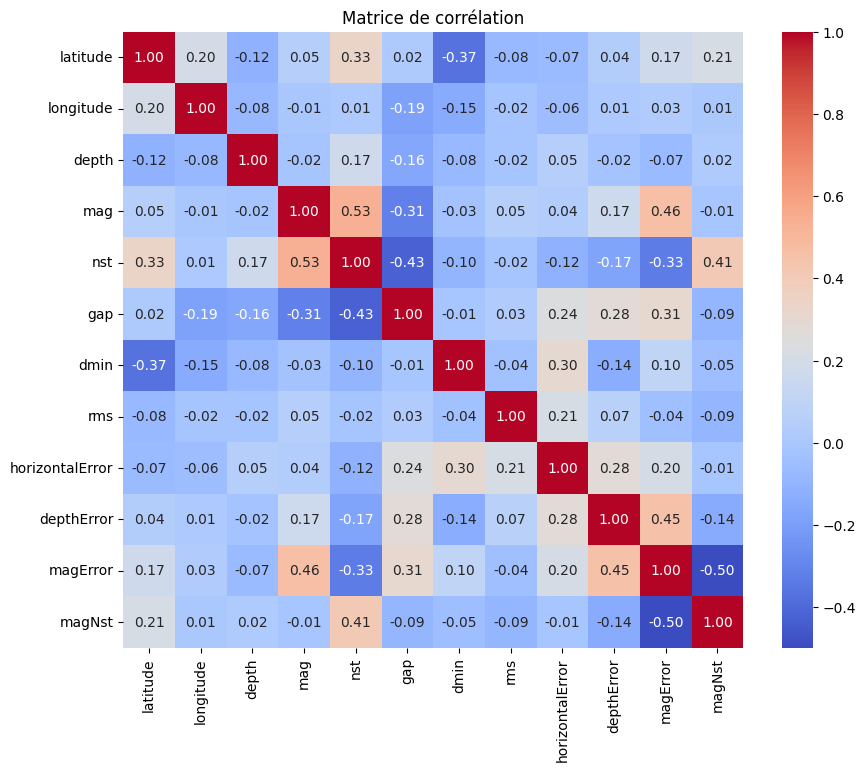

In [216]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Transformation

In [218]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2026-01-07 22:00:13.258000+00:00,-23.4332,-179.8984,547.033,5.5,mww,63.0,39.0,5.976,1.13,us7000rnbi,2026-01-07T22:24:28.537Z,south of the Fiji Islands,earthquake,8.66,7.704,0.093,11.0,reviewed
1,2026-01-07 04:12:56.792000+00:00,7.2863,127.0595,11.854,5.5,mww,58.0,53.0,1.485,1.40,us7000rn4a,2026-01-07T16:31:18.040Z,"53 km E of Santiago, Philippines",earthquake,5.21,4.721,0.098,10.0,reviewed
2,2026-01-07 03:02:56.040000+00:00,7.3902,126.7221,35.000,6.4,mww,118.0,30.0,1.178,1.17,us7000rn2z,2026-01-07T15:50:12.915Z,"16 km ESE of Baculin, Philippines",earthquake,7.94,1.842,0.047,44.0,reviewed
3,2026-01-06 23:10:38.371000+00:00,-17.6276,168.2465,62.384,5.0,mww,47.0,79.0,2.388,0.54,us7000rn1j,2026-01-07T12:59:00.885Z,"13 km NNW of Port-Vila, Vanuatu",earthquake,9.64,6.266,0.103,9.0,reviewed
4,2026-01-06 19:17:09.696000+00:00,37.2523,74.6137,10.000,5.2,mb,112.0,54.0,1.991,0.88,us7000rmzt,2026-01-07T05:04:55.711Z,"103 km N of Barishal, Pakistan",earthquake,6.54,1.848,0.049,136.0,reviewed


In [219]:
for i in df.select_dtypes(include='number'):
    df.fillna({i: df[i].mean()}, inplace=True)

df.fillna({'place': 'Inconnu'}, inplace=True)

df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0


In [220]:
df["time"] = pd.to_datetime(df["time"], format="mixed", utc=True)
df["date_ts_ms"] = df["time"].astype("int64") // 10**6

In [221]:
df = df.drop(["magType", "id", "status", "updated", "place", "type", "time"], axis=1)

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df.copy()
cols = df_scaled.select_dtypes(include="number").columns

df_scaled[cols] = scaler.fit_transform(df_scaled[cols])

In [235]:
df_scaled.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,date_ts_ms
0,-0.897763,-1.804759,4.518020,0.097182,-1.376348,-0.993451,0.742896,0.544656,0.219991,-0.036223,-0.879435,-0.836722,1.357257
1,0.115120,0.711479,-0.462753,0.097182,-1.449118,-0.416807,-1.175484,1.410081,-0.699669,-0.424388,-0.823436,-0.855791,1.357177
2,0.118545,0.708714,-0.247339,1.951828,-0.575879,-1.364151,-1.306623,0.672867,0.028062,-0.799021,-1.394623,-0.207443,1.357171
3,-0.706341,1.049103,0.007517,-0.933178,-1.609212,0.654103,-0.789758,-1.346459,0.481228,-0.223344,-0.767437,-0.874861,1.357154
4,1.103158,0.281563,-0.480008,-0.521034,-0.663203,-0.375619,-0.959341,-0.256664,-0.345134,-0.798240,-1.372223,1.546912,1.357136


# Model prédiction Magnitude

In [223]:
df_1 = df_scaled.copy()

In [224]:
from sklearn.model_selection import train_test_split
X = df_1.drop("mag", axis=1)
y = df_1["mag"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
xgb_model_1 = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [226]:
xgb_model_1.fit(X_train_1, y_train_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Analyse


In [227]:
xgb_model_1.score(X_test_1, y_test_1)

0.5881082633507593

# Model prédiction Depth

In [228]:
df_2 = df_scaled.copy()

In [229]:
from sklearn.model_selection import train_test_split
X = df_2.drop("depth", axis=1)
y = df_2["depth"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
xgb_model_2 = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [231]:
X_train_2

,latitude,longitude,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,date_ts_ms
25582,-0.777772,-1.788057,-0.727106,-0.634095,2.297539,0.000000,3.523389e-01,0.000000,-8.879397e-02,0.000000,-2.455810e-01,0.774879
19850,1.706249,-1.616933,-0.727106,0.000000,0.000000,0.000000,-1.057984e+00,0.000000,-8.695488e-01,0.000000,-2.709879e-16,0.903150
13980,0.075497,0.625619,-0.521034,0.000000,1.189558,-1.651769,9.933948e-01,-1.182158,-7.914734e-01,-1.293825,-4.553409e-01,1.045928
84883,-0.095219,0.684301,-0.727106,0.000000,0.000000,0.000000,3.558575e-16,0.000000,-1.155749e-16,0.000000,-2.709879e-16,-0.652251
27072,0.764295,0.847502,-0.521034,1.257922,-0.927549,0.000000,3.181101e-02,0.000000,-1.155749e-16,0.000000,1.909225e+00,0.759471
...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0.383864,0.668243,0.097182,0.000000,0.000000,0.000000,-1.925585e-01,0.000000,-1.155749e-16,0.000000,-2.709879e-16,0.078430
76820,1.689786,-1.644169,-0.108890,0.000000,0.000000,0.000000,3.558575e-16,0.000000,-1.155749e-16,0.000000,-2.709879e-16,-0.459775
103694,-0.324869,0.891727,1.209970,0.000000,0.000000,0.000000,3.558575e-16,0.000000,1.459703e+00,1.102919,-2.709879e-16,-2.597755
860,-0.768569,-1.755238,-0.314962,-0.721419,0.736481,5.758622,-7.374560e-01,1.262273,-7.981098e-01,-0.879435,-8.367224e-01,1.340508


In [232]:
xgb_model_2.fit(X_train_2, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Analyse

In [233]:
xgb_model_2.score(X_test_2, y_test_2)

0.8393969549097989